# Exploratory Data Analysis

## General

In [1]:
library( tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.2.2"
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'tidyr' was built under R version 4.2.2"
Warning message:
"package 'readr' was built under R version 4.2.2"
Warning message:
"package 'purrr' was built under R version 4.2.2"
Warning message:
"package 'dplyr' was built under R version 4.2.2"
Warning message:
"package 'stringr' was built under R version 4.2.2"
Warning message:
"package 'forcats' was built under R version 4.2.2"
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df_1991 = read_csv( '../data/foia-504-fy1991-fy2009-asof-221231.csv')
df_2010 = read_csv( '../data/foia-504-fy2010-present-asof-221231.csv')
df = rbind( df_1991, df_2010)

Rows: 111341 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (28): BorrName, BorrStreet, BorrCity, BorrState, BorrZip, CDC_Name, CDC_...
dbl  (9): AsOfDate, Program, ThirdPartyDollars, GrossApproval, ApprovalFisca...
lgl  (1): BusinessAge

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 96344 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): BorrName, BorrStreet, BorrCity, BorrState, BorrZip, CDC_Name, CDC_...
dbl  (9): AsOfDate, Program, ThirdPartyDollars, GrossApproval, ApprovalFisca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head( df)

AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,⋯,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
20221231,504,JACK BINGHAM PHOTOGRAPHY,SCRUTON POND ROAD,BARRINGTON,NH,03825,Granite State Economic Develop,One Cate Street,Portsmouth,⋯,NH,NEW HAMPSHIRE DISTRICT OFFICE,01,INDIVIDUAL,NA,PIF,05/31/2005,NA,0,4
20221231,504,"INTERMTN LIFT, INCORPORATED",2120 SOUTH STATE STREET,SPRINGVILLE,UT,84663,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,⋯,UT,UTAH DISTRICT OFFICE,03,CORPORATION,NA,PIF,01/31/2012,NA,0,35
20221231,504,"ITALPAST, AMERICA, INC.",2210 HEWITT,EVERETT,WA,98290,Evergreen Business Capital,13925 Interurban Ave. S,Seattle,⋯,WA,SEATTLE DISTRICT OFFICE,01,CORPORATION,NA,PIF,05/31/2005,NA,0,11
20221231,504,"WAREHOUSE PLUS, INC.",7001 HIGHWAY 271 SOUTH,FORT SMITH,AR,72903,NA,NA,NA,⋯,AR,ARKANSAS DISTRICT OFFICE,03,CORPORATION,NA,PIF,05/31/2005,NA,0,8
20221231,504,SPECIALTY PRODUCTS,40TH ST. & DONALD PARKWAY,FAIRFIELD,AL,35208,Southern Development Council,200 Office Park Dr.,Mountain Brook,⋯,AL,ALABAMA DISTRICT OFFICE,07,INDIVIDUAL,NA,CANCLD,NA,NA,0,15
20221231,504,ANOKA SPORT SHACK,202 MAIN ST.,ANOKA,MN,55303,Central Minnesota Development,1885 Station Parkway,Andover,⋯,MN,MINNESOTA DISTRICT OFFICE,03,CORPORATION,NA,PIF,05/31/2005,NA,0,8


In [4]:
df <- df |>
    select(
    'Program', 'BorrCity', 'BorrState', 'CDC_State', 'ThirdPartyLender_State',  
    'ApprovalFiscalYear', 'DeliveryMethod', 'NaicsCode', 'NaicsDescription', 
    'FranchiseCode', 'FranchiseName', 'ProjectState', 'BusinessType', 'BusinessAge', 'LoanStatus',
    'ThirdPartyDollars', 'GrossApproval', 'TermInMonths', 'GrossChargeOffAmount', 'JobsSupported'
)

head( df)

Program,BorrCity,BorrState,CDC_State,ThirdPartyLender_State,ApprovalFiscalYear,DeliveryMethod,NaicsCode,NaicsDescription,FranchiseCode,FranchiseName,ProjectState,BusinessType,BusinessAge,LoanStatus,ThirdPartyDollars,GrossApproval,TermInMonths,GrossChargeOffAmount,JobsSupported
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
504,BARRINGTON,NH,NH,NA,1991,504,541921,"Photography Studios, Portrait",NA,NA,NH,INDIVIDUAL,NA,PIF,NA,65000,240,0,4
504,SPRINGVILLE,UT,UT,NA,1991,504,332312,Fabricated Structural Metal Manufacturing,NA,NA,UT,CORPORATION,NA,PIF,NA,322000,240,0,35
504,EVERETT,WA,WA,NA,1991,504,421830,Industrial Machinery and Equipment Wholesalers,NA,NA,WA,CORPORATION,NA,PIF,NA,208000,240,0,11
504,FORT SMITH,AR,NA,NA,1991,504,NA,NA,NA,NA,AR,CORPORATION,NA,PIF,NA,217000,120,0,8
504,FAIRFIELD,AL,AL,NA,1991,504,NA,NA,NA,NA,AL,INDIVIDUAL,NA,CANCLD,NA,106000,240,0,15
504,ANOKA,MN,MN,NA,1991,504,451110,Sporting Goods Stores,NA,NA,MN,CORPORATION,NA,PIF,NA,71000,240,0,8


In [5]:
for (i in names( df)){
    if ( class( df[[ i]]) == 'character'){
        print( paste( i, length( levels( as.factor( df[[ i]])))))
    }
}

[1] "BorrCity 19132"
[1] "BorrState 54"
[1] "CDC_State 51"
[1] "ThirdPartyLender_State 60"
[1] "DeliveryMethod 6"
[1] "NaicsDescription 1237"
[1] "FranchiseCode 2440"
[1] "FranchiseName 2254"
[1] "ProjectState 55"
[1] "BusinessType 3"
[1] "BusinessAge 10"
[1] "LoanStatus 5"


In [6]:
for ( i in c( 'Program', 'ApprovalFiscalYear')){ # Categorical variables that are not parsed as characters.
    print( paste( i, length( levels( as.factor( df[[ i]])))))
}

[1] "Program 1"
[1] "ApprovalFiscalYear 33"


The feature `Program` is completely useless as it only has one class. This variable will be removed from the data frame.

It is quite weird that number of `NaicsDescrption` and `NaicsCode` do not match. Also the case with `FranchiseName` and `FranchiseCode`.

In [7]:
df <- df |>
    select( -Program)

In [8]:
df <- df |>
    mutate( ApprovalFiscalYear = as.factor( ApprovalFiscalYear)) |>
    mutate_if( is.character, as.factor)

In [9]:
df |>
    group_by( LoanStatus) |>
    summarise( Count = n()) |>
    arrange( desc( Count))

LoanStatus,Count
<fct>,<int>
PIF,100797
EXEMPT,57161
CANCLD,28722
CHGOFF,11937
NOT FUNDED,8707
NA,361


While our major goal is to predict risks of specific loans, we are more interested in loans that were either Paid in Full (`PIF`) or Charge Off (`CHGOFF`). Loans that were not approved (`NOT FUNDED`) have not risk components. Loans that are excepted (`EXEMPT`) or cancelled (`CANCLD`) are eseentially censored data which we do not know whether the loans would be paid if they had not been exempted/cancelled. Thus, we only include observations that are either Paid in Full (`PIF`) or Charge Off (`CHGOFF`).

In [10]:
df <- df |>
    filter( (LoanStatus=='PIF') | (LoanStatus=='CHGOFF'))

To maintain scientisfic robustness and prevent data leakge, only the training data set after splitting is visually inspected here. Data splitting is performed with `src/01-data-splitting.py`.

In [11]:
df <- read_csv( '../data/train.csv')

New names:
• `` -> `...1`
Rows: 56367 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): BorrCity, BorrState, CDC_State, ThirdPartyLender_State, DeliveryMe...
dbl  (8): ...1, ApprovalFiscalYear, NaicsCode, ThirdPartyDollars, GrossAppro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Individual variables

This section examines the distribution of each indiviudal variables and their associations with the status of the loans.

In [12]:
count_plot <- function( column, data, title, lab, cat_on_x = TRUE){
    data |>
        ggplot() + {
        if (cat_on_x==TRUE)
            aes( x = {{column}})
        else 
            aes( y = {{column}})
        } +
        geom_bar() +
        labs( title = title, x = lab, y = 'Count')
}

### `LoanStatus`

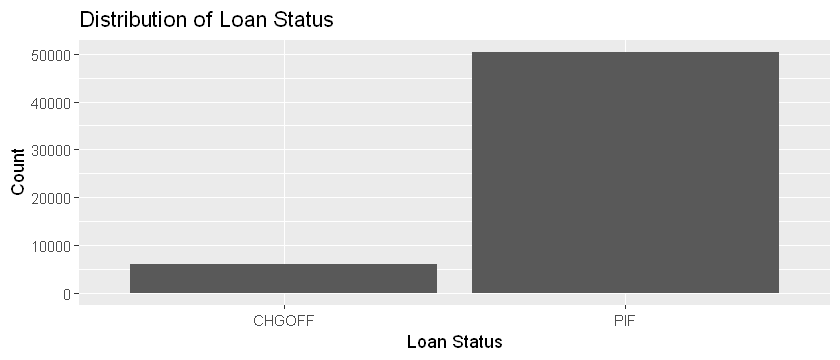

In [13]:
options(repr.plot.width=7, repr.plot.height=3)
count_plot( LoanStatus, df, title = 'Distribution of Loan Status', lab = 'Loan Status')

There is serious class imbalance between 2 classes of loan status. It should be handled with cautious when building and evaluating the relevant machine learning models.

### `BorrState`

In [14]:
# Adding new columns to facilitate data wrangling
df <- df |>
    mutate( pif = case_when( LoanStatus == 'PIF' ~ 1,
                            TRUE ~ 0),
            chgoff = case_when( LoanStatus == 'CHGOFF' ~ 1,
                                TRUE ~ 0)
    )

In [32]:
library(usmap)

state_plot <- function( state_column, data, title = '% of Charge-Off Loans'){
    state_df <- data |>
        mutate( state = {{ state_column}}) |>
        group_by( state) |>
        summarise( chgoff_percentage = round( sum( chgoff) / ( sum( chgoff) + sum( pif)) * 100, 2))
    
    plot_usmap( data = state_df, values = 'chgoff_percentage', color = 'gray') +
        scale_fill_continuous(
            low = "White", high = "Red", name = "% of Charged-off Loans"
        ) +
        theme(legend.position = "right") +
        labs( title = title)
}

state_count_plot <- function( state_column, data, title = 'Number of Occurence in each State'){
    state_df <- data |>
        mutate( state = {{ state_column}}) |>
        group_by( state) |>
        summarise( n = n())
    
    plot_usmap( data = state_df, values = 'n', color = 'gray') +
        scale_fill_continuous(
            low = "white", high = "blue", name = "Count"
        ) +
        theme(legend.position = "right") +
        labs( title = title)
}

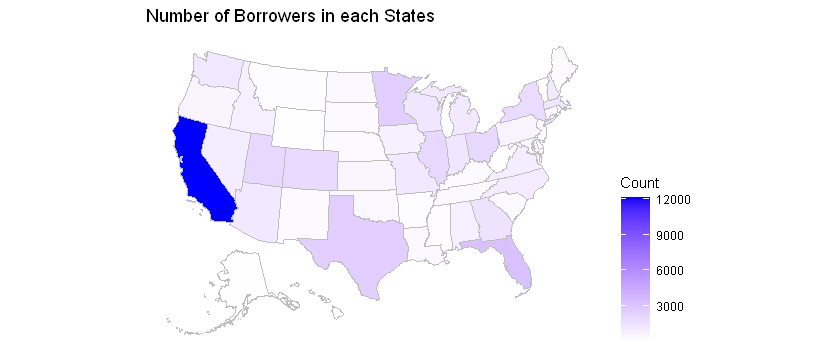

In [33]:
state_count_plot( BorrState, df, title = 'Number of Borrowers in each States')

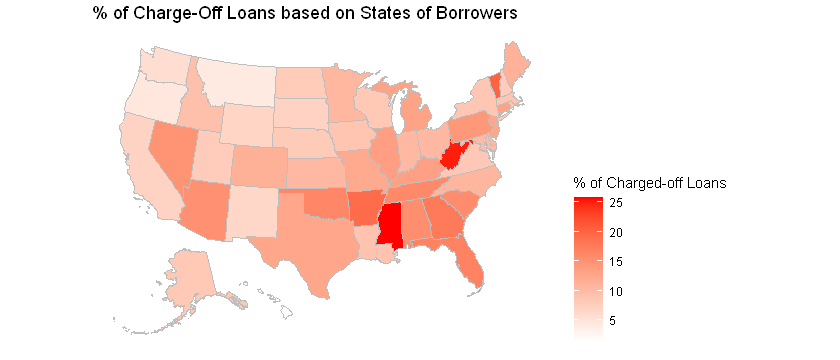

In [34]:
state_plot( BorrState, df, title = '% of Charge-Off Loans based on States of Borrowers')

It is visually significant that loans in some states are more probable to be charged off.

### `CDC_State`

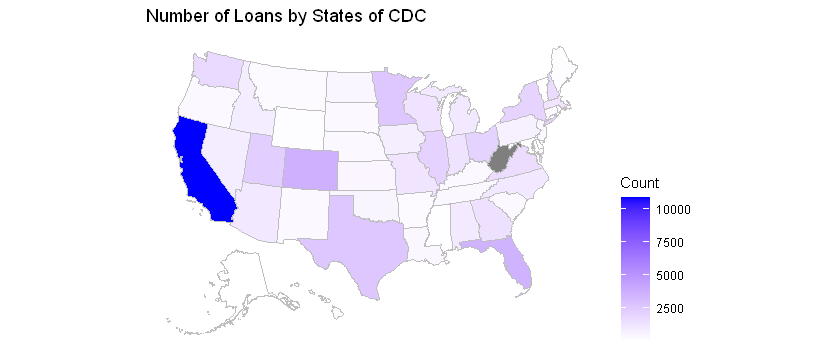

In [35]:
state_count_plot( CDC_State, df, title = 'Number of Loans by States of CDC')

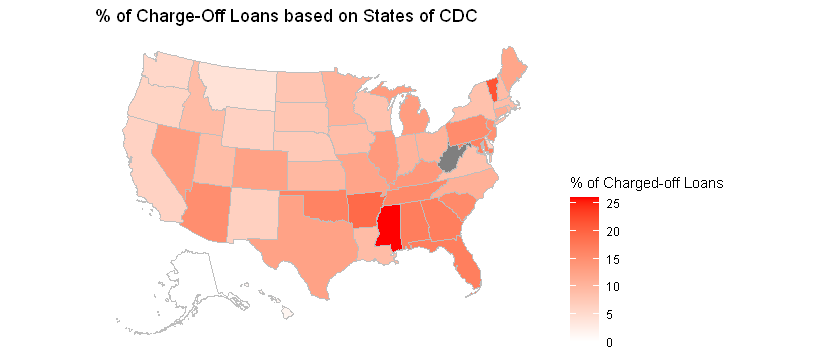

In [36]:
state_plot( CDC_State, df, title = '% of Charge-Off Loans based on States of CDC')

Similar pattern is observed with CDCs' states. It is due to fact that usually small business receive loans from organizations from their own states. This varaible is redundant in machine learning.

### `ThirdPartyLender_State`

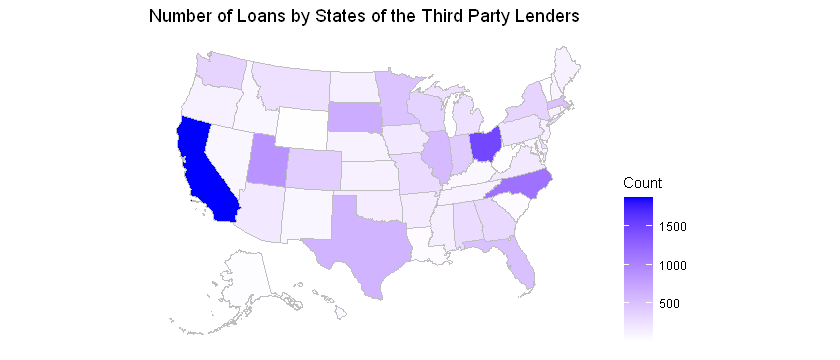

In [37]:
state_count_plot( ThirdPartyLender_State, df, title = 'Number of Loans by States of the Third Party Lenders')

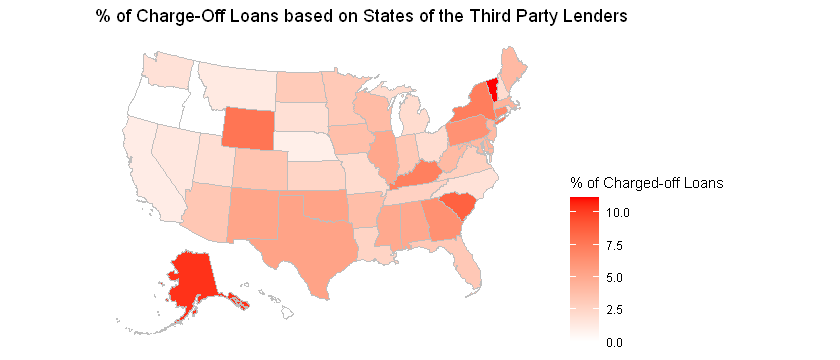

In [38]:
state_plot( ThirdPartyLender_State, df, title = '% of Charge-Off Loans based on States of the Third Party Lenders')

States of the third party lenders are potentially associated with charged-off rate with the visually observed difference in terms of the percentage in each state. 

### `ApprovalFiscalYear`

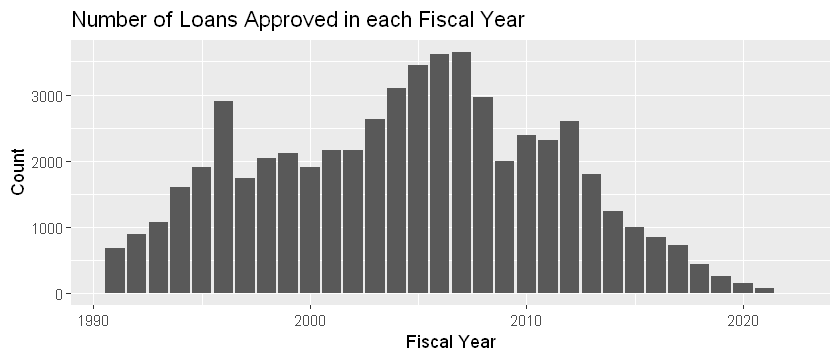

In [21]:
count_plot( ApprovalFiscalYear, data = df, title = 'Number of Loans Approved in each Fiscal Year', lab = 'Fiscal Year')

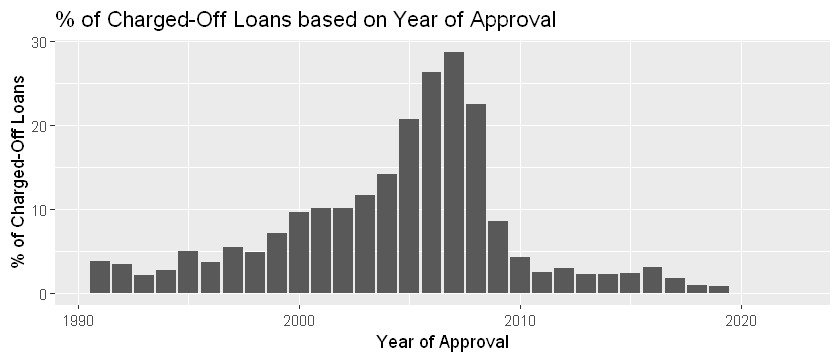

In [19]:
df |>
    group_by( ApprovalFiscalYear) |>
    summarise( chgoff_percentage = round( sum( chgoff) / ( sum( chgoff) + sum( pif)) * 100, 2)) |>
    ggplot() +
    aes( x = ApprovalFiscalYear, y = chgoff_percentage) +
    geom_bar( stat = 'identity') +
    labs( title = '% of Charged-Off Loans based on Year of Approval', x = 'Year of Approval', y = '% of Charged-Off Loans')
    

It is observed that more loans were charged off in the year between 2005 to 2009. Still, year of approval will not be a useful feature for us to study the risk of future small business loans.

### `DeliveryMethod`

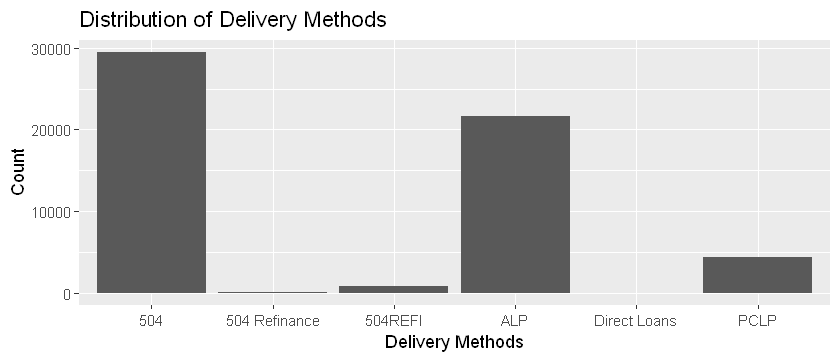

In [41]:
count_plot( DeliveryMethod, df, title = 'Distribution of Delivery Methods', lab = 'Delivery Methods')

Delviery methods are mostly 504, ALP, and PCLP. The association between other methods (504 Refinace, 504REFI, and Direct Loans) and chance of a loan being charged off may not be very robust as the sample sizes are relatively smaller.

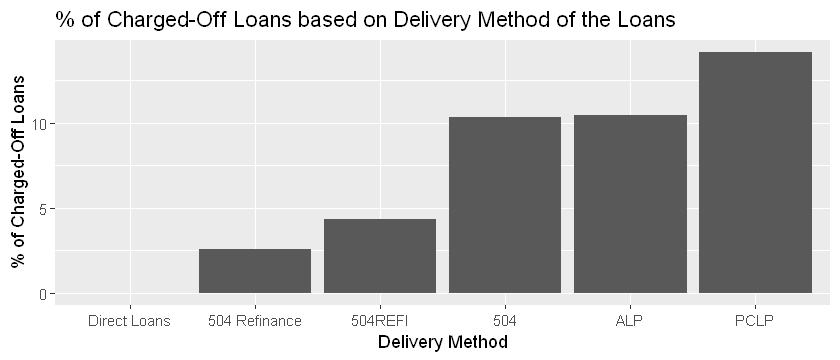

In [20]:
df |>
    group_by( DeliveryMethod) |>
    summarise( chgoff_percentage = round( sum( chgoff) / ( sum( chgoff) + sum( pif)) * 100, 2)) |>
    ggplot() +
    aes( x = reorder( DeliveryMethod, chgoff_percentage), y = chgoff_percentage) +
    geom_bar( stat = 'identity') +
    labs( title = '% of Charged-Off Loans based on Delivery Method of the Loans', x = 'Delivery Method', y = '% of Charged-Off Loans')
    

It is visually obvious that some delivery methods are associated with lower charged-off rate. This may useful in predict loan risks.

### `NaicsCode`

In [21]:
length( unique( df$NaicsCode))

[1] 1131

While there are too many codes in the North American Industry Classification System, we can extract the sectors by using the first 2 digits of  each NAICS code.

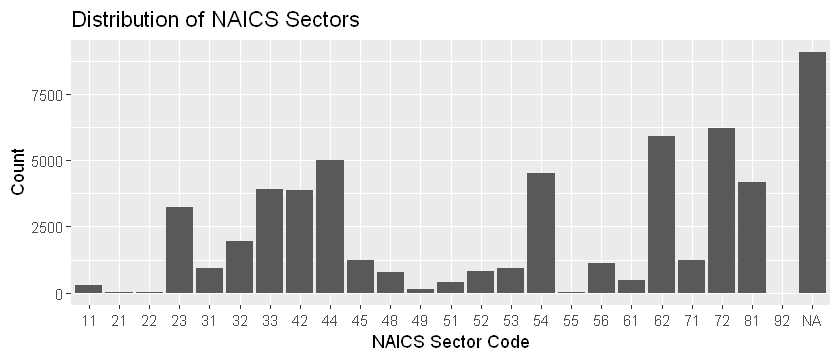

In [44]:
df <- df |>
    mutate( NaicsSector = substr( as.character( NaicsCode), 1, 2))

count_plot( NaicsSector, df, title = 'Distribution of NAICS Sectors', lab = 'NAICS Sector Code')

Many observations are without NAICS code provided. While the number of occurence of `NA` is large, it is more appropriate to use `NA`s as a separate class.

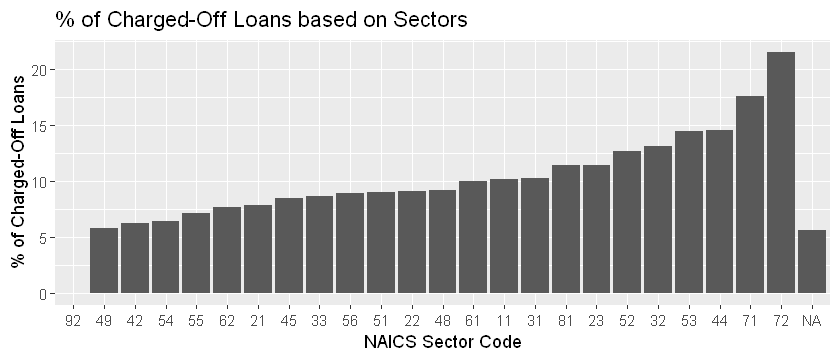

In [45]:
df |>
    group_by( NaicsSector) |>
    summarise( chgoff_percentage = round( sum( chgoff) / ( sum( chgoff) + sum( pif)) * 100, 2)) |>
    arrange( NaicsSector) |>
    ggplot() +
    aes( x = reorder( NaicsSector, chgoff_percentage), y = chgoff_percentage) +
    geom_bar( stat = 'identity') +
    labs( title = '% of Charged-Off Loans based on Sectors', x = 'NAICS Sector Code', y = '% of Charged-Off Loans')

With NAICS sectors, we no longer need `NaicsDescription` as they are too sparsed to be analyzed.

### `FranchiseCode` and `FranchiseName`

In [46]:
nrow( df)

[1] 56367

In [47]:
df |>
    group_by( FranchiseCode) |>
    summarise( percentage = n() / nrow( df) * 100) |>
    arrange( desc( percentage)) |>
    head( 3)

FranchiseCode,percentage
<chr>,<dbl>
NA,91.2555218
80979,0.3175617
79140,0.2536945


In [48]:
df |>
    group_by( FranchiseName) |>
    summarise( percentage = n() / nrow( df) * 100) |>
    arrange( desc( percentage)) |>
    head( 3)

FranchiseName,percentage
<chr>,<dbl>
NA,91.2590700
SUPER 8 MOTEL,0.3743325
HOLIDAY INN EXPRESS,0.3211099


While most of the of the observations are not associated with any franchise, it may be infeasible to use franchise code or name to prediction loan risk.

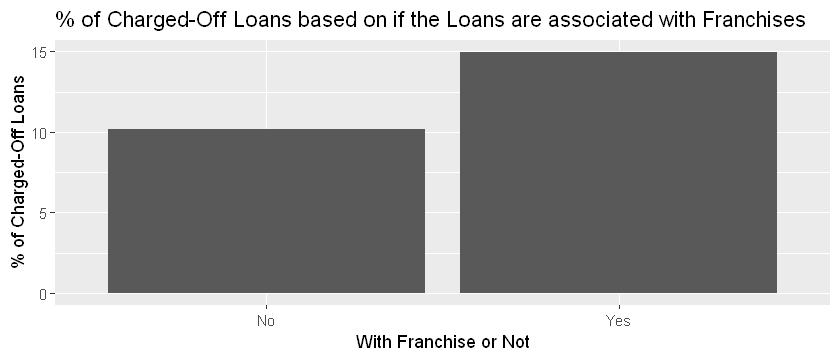

In [49]:
df |>
    mutate( franchise = case_when( is.na( FranchiseName) ~ 'No',
                                    TRUE ~ 'Yes')) |>
    group_by( franchise) |>
    summarise( chgoff_percentage = round( sum( chgoff) / ( sum( chgoff) + sum( pif)) * 100, 2)) |>
    ggplot() +
    aes( x = reorder( franchise, chgoff_percentage), y = chgoff_percentage) +
    geom_bar( stat = 'identity') +
    labs( title = '% of Charged-Off Loans based on if the Loans are associated with Franchises',
            x = 'With Franchise or Not', y = '% of Charged-Off Loans')

It is possible to that loans associated with existing franchises are with higher chance of being charged off. It can be a useful feature in predicting loan risk.

### `ProjectState`

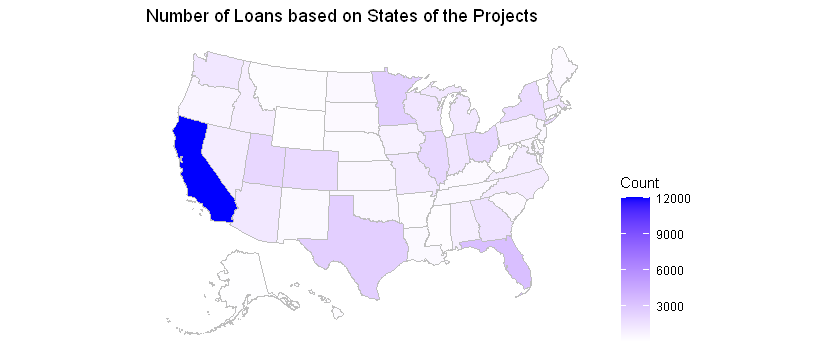

In [50]:
state_count_plot( ProjectState, data = df, title = 'Number of Loans based on States of the Projects')

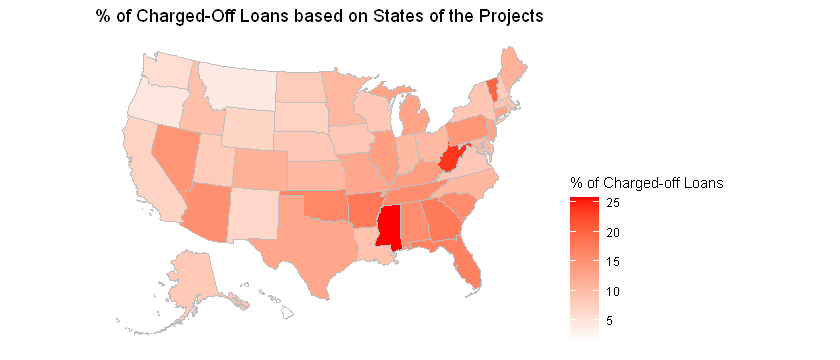

In [27]:
state_plot( ProjectState, data = df, title = '% of Charged-Off Loans based on States of the Projects')

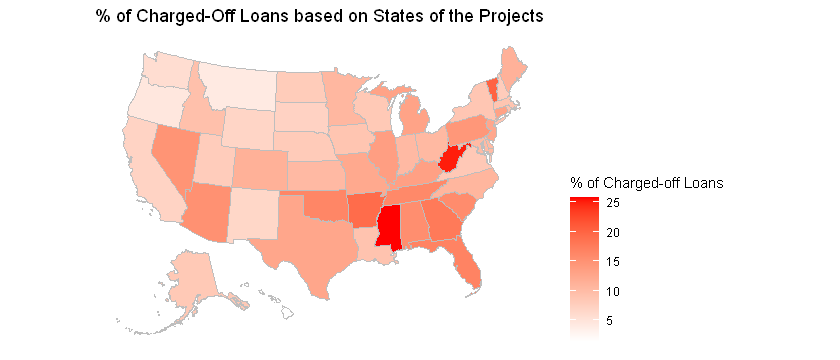

In [28]:
state_plot( BorrState, data = df, title = '% of Charged-Off Loans based on States of the Projects')

While borrowers usually use the loans in projects in their own states, the states of the projects will be a redundant information in predicting loan risks.

### `BusinessType`

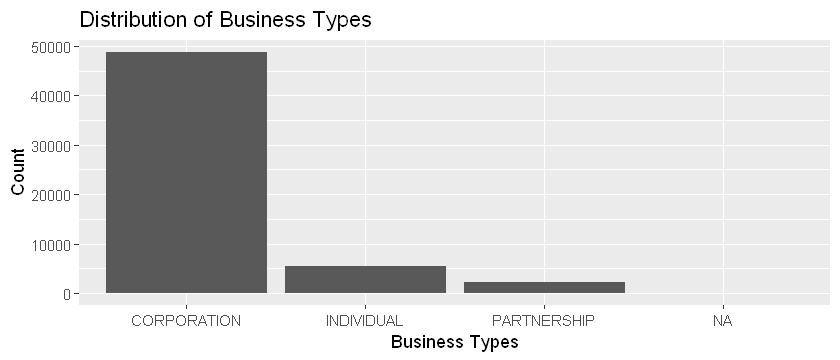

In [51]:
count_plot( BusinessType, df, title = 'Distribution of Business Types', lab = 'Business Types')

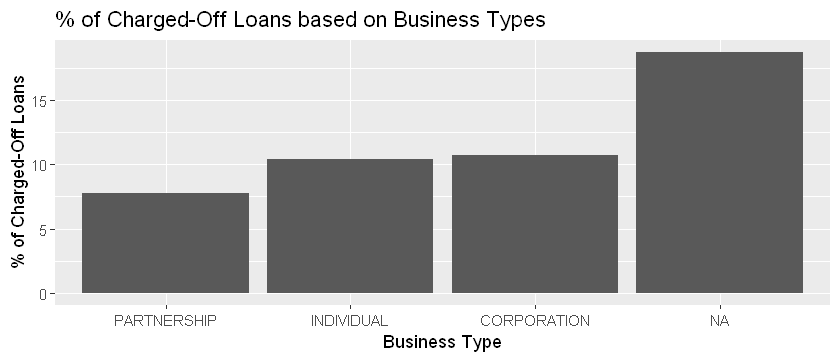

In [29]:
df |>
    group_by( BusinessType) |>
    summarise( chgoff_percentage = round( sum( chgoff) / ( sum( chgoff) + sum( pif)) * 100, 2)) |>
    ggplot() +
    aes( x = reorder( BusinessType, chgoff_percentage), y = chgoff_percentage) +
    geom_bar( stat = 'identity') +
    labs( title = '% of Charged-Off Loans based on Business Types',
            x = 'Business Type', y = '% of Charged-Off Loans')

Business not providing their business types seem to be more susceptible to be charged-off. Loans for business in partnership seem to have lower charged-off rate. By further inspecting the samples size of each business type, it should be noted that there is only a small amount of business having no business type provided. Still, business type is potentially useful in predicting loan risks.

### `BusinessAge`

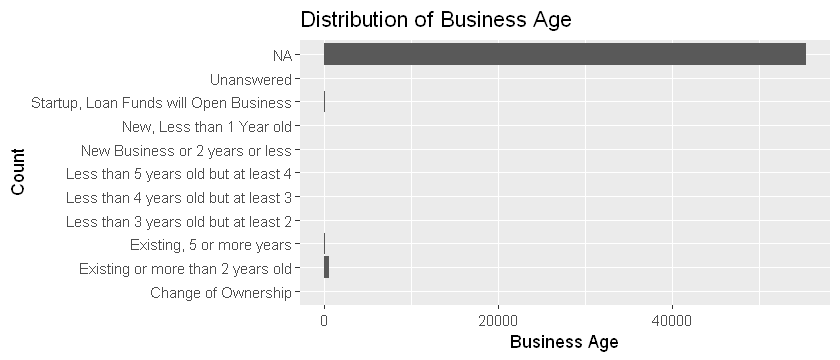

In [52]:
count_plot( BusinessAge, df, title = 'Distribution of Business Age', lab = 'Business Age', cat_on_x = FALSE)

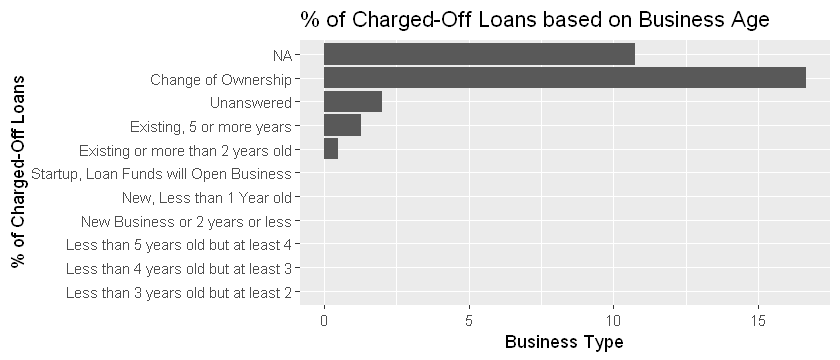

In [33]:
df |>
    group_by( BusinessAge) |>
    summarise( chgoff_percentage = round( sum( chgoff) / ( sum( chgoff) + sum( pif)) * 100, 2)) |>
    ggplot() +
    aes( y = reorder( BusinessAge, chgoff_percentage), x = chgoff_percentage) +
    geom_bar( stat = 'identity') +
    labs( title = '% of Charged-Off Loans based on Business Age',
            x = 'Business Type', y = '% of Charged-Off Loans')

While business age seems to associated with loan status, there are many null values in the column. This variable will not be useful in prediction loan risky.

### `ThirdPartyDollars`

In [69]:
sum( is.na( df$ThirdPartyDollars)) / nrow( df) * 100

[1] 73.13144

Many observations do not have third party dollars. Imputation will be performed by replace null values with 0.

In [73]:
df <- df |>
    mutate( ThirdPartyDollars = case_when( is.na( ThirdPartyDollars) ~ 0,
                                            TRUE ~ ThirdPartyDollars))

In [91]:
boxplot <- function( column, data, title = '', lab = '', dollar = TRUE){
    data |>
        ggplot() +
        aes( x = {{column}}, y = LoanStatus) +
        geom_boxplot() +
        labs( title = title, x = lab, y = 'Loan Status') + {
            if (dollar)
                scale_x_continuous( labels = scales::label_dollar(), trans='log10')
            else {}
        }
        
}

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 41222 rows containing non-finite values (`stat_boxplot()`)."


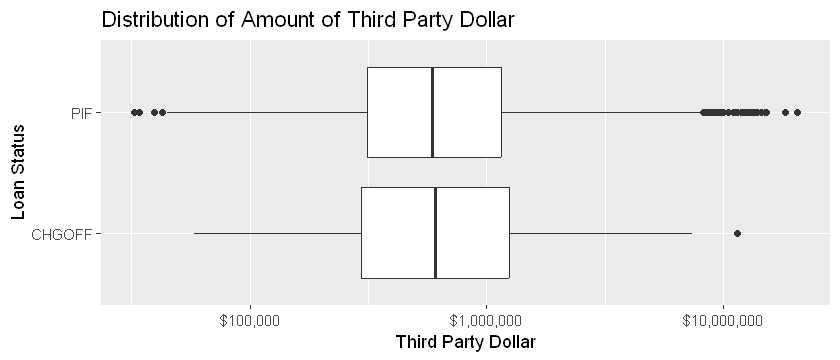

In [92]:
boxplot( ThirdPartyDollars, df, title = 'Distribution of Amount of Third Party Dollar', lab = 'Third Party Dollar')

It is possible that loans that are paid in full amount have received more third party fund. This feature is potentially useful in predicting loan risk.

### `GrossApproval`

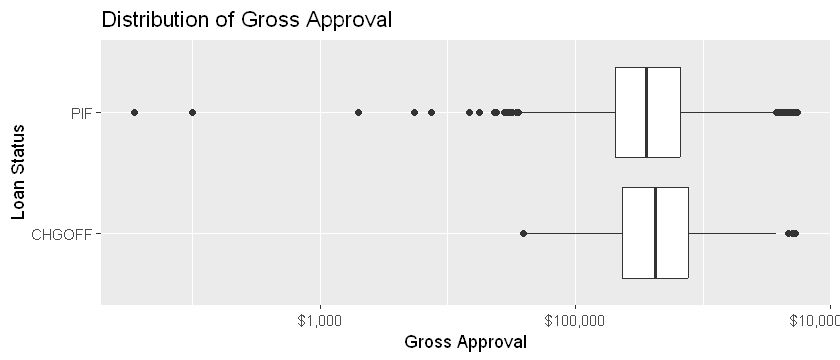

In [88]:
boxplot( GrossApproval, df, title = 'Distribution of Gross Approval', lab = 'Gross Approval')

There is not visually obvious difference between 2 types of loans in terms of the amount approved. In fact, this variable may not be useful in predict risks in practice as the executives should tune the gross amount to be approved based on the risk of the loans.

### `TermInMonths`

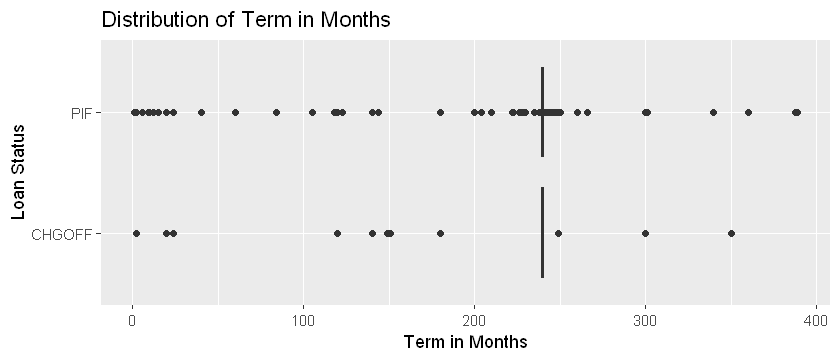

In [93]:
boxplot( TermInMonths, df, title = 'Distribution of Term in Months', lab = 'Term in Months', dollar = FALSE)

No visual difference is observed in terms of term in months. Still, this column can be used in machine leanring models with feature selection process applied.

### `GrossChargeOffAmount`

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 50406 rows containing non-finite values (`stat_bin()`)."


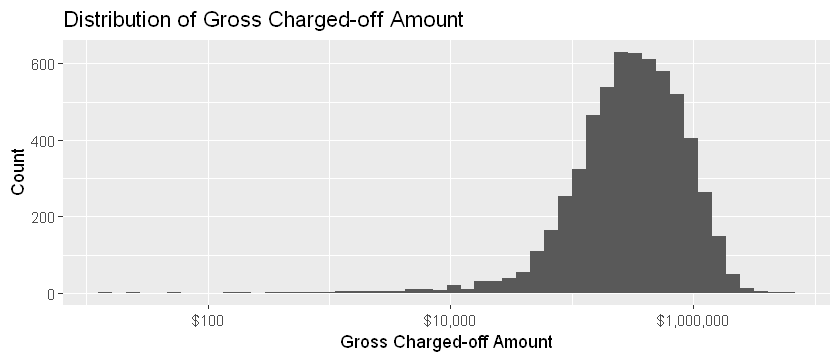

In [96]:
df |>
    ggplot() +
    aes( x = GrossChargeOffAmount) +
    geom_histogram( bins = 50) +
    scale_x_continuous( labels = scales::label_dollar(), trans='log10') +
    labs( title = 'Distribution of Gross Charged-off Amount', x = 'Gross Charged-off Amount', y = 'Count')

This column in the data set will not be used to predict risks as amount charged-off is only known only when a loan is charged off.

### `JobsSupported`

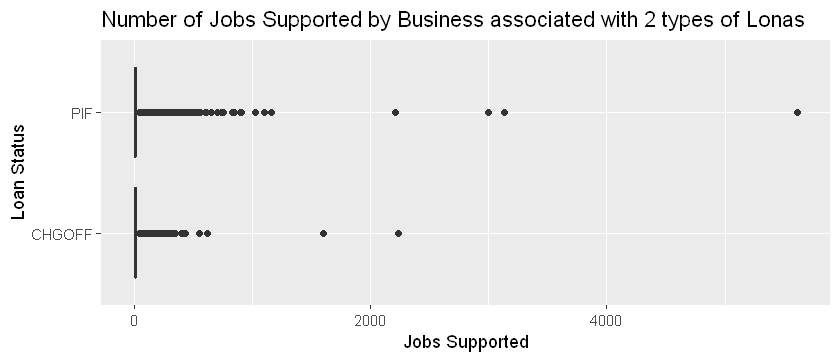

In [95]:
boxplot( JobsSupported, df, title = 'Number of Jobs Supported by Business associated with 2 types of Lonas', lab = 'Jobs Supported', dollar = FALSE)

No visual difference is observed in terms of term in months. Still, this column can be used in machine leanring models with feature selection process applied.